In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from prophet import Prophet


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
data = pd.read_csv('D:/DATA SCIENCE/Time Series Forecasting/PRICE_AND_DEMAND_201801_NSW1.csv')

In [12]:
# Pastikan kolom tanggal dalam format datetime
data['SETTLEMENTDATE'] = pd.to_datetime(data['SETTLEMENTDATE'])

# Hanya mengambil kolom yang relevan
data = data[['SETTLEMENTDATE', 'TOTALDEMAND']]

In [13]:
# Mengganti nama kolom sesuai format Prophet
data = data.rename(columns={'SETTLEMENTDATE': 'ds', 'TOTALDEMAND': 'y'})

Visualisasi Data Asli

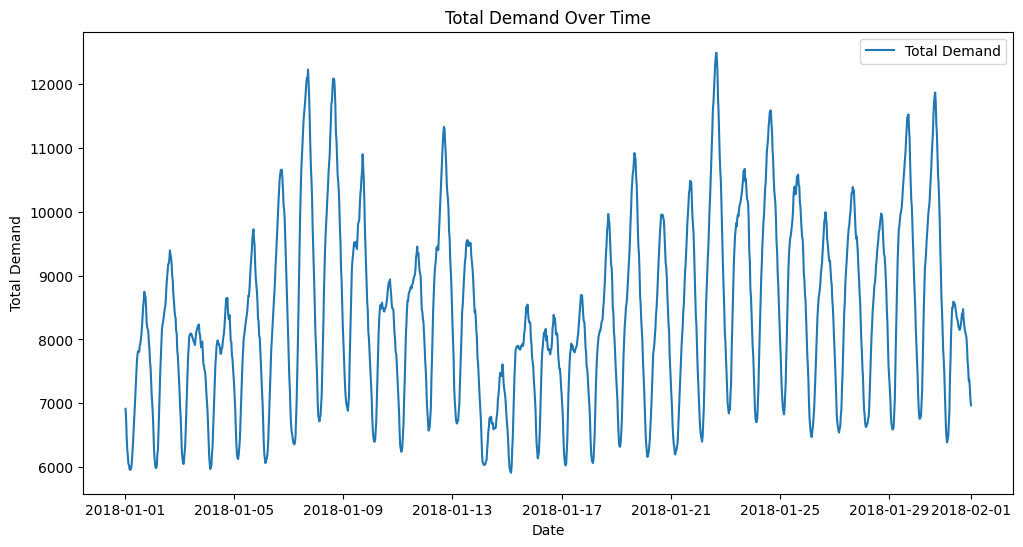

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Total Demand')
plt.title('Total Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Total Demand')
plt.legend()
plt.savefig('Visualisasi/Data Asli Total Demand.png')
plt.show()

# Model Prophet

In [14]:
# Inisialisasi model Prophet
model = Prophet()

# Melatih model dengan data
model.fit(data)

11:07:19 - cmdstanpy - INFO - Chain [1] start processing
11:07:20 - cmdstanpy - INFO - Chain [1] done processing


Membuat prediksi di masa depan (30 hari kedepan)

In [15]:
# Membuat data frame untuk periode di masa depan (30 hari)
future = model.make_future_dataframe(periods=30)

# Mendapatkan prediksi
forecast = model.predict(future)

Visualisasi

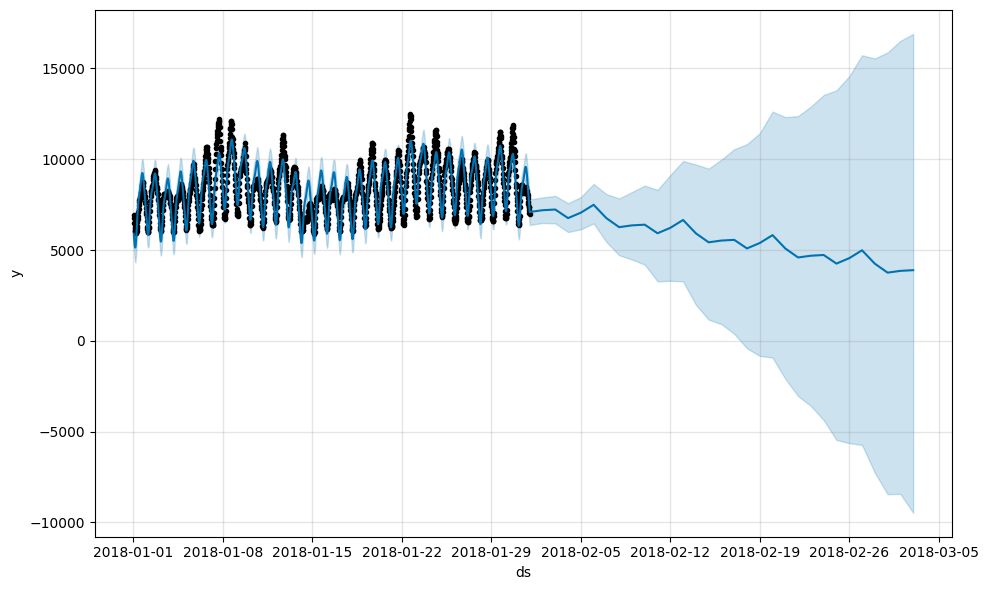

In [23]:
# Plot hasil prediksi
model.plot(forecast)
plt.savefig('Visualisasi/Hasil Prediksi.png')
plt.show()

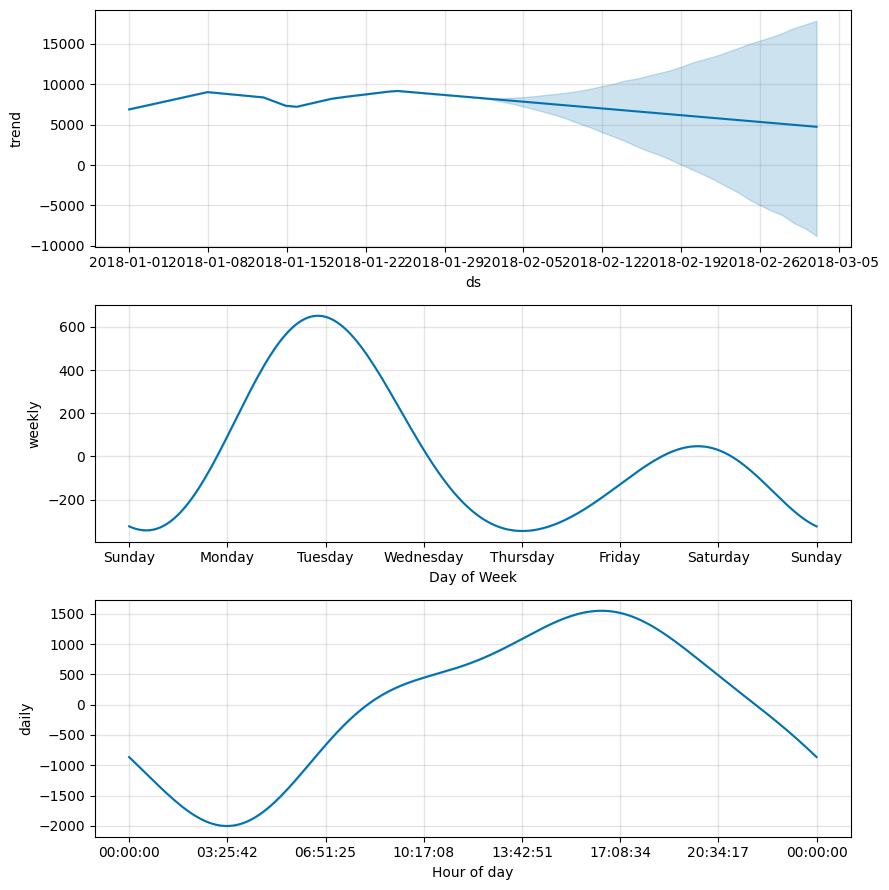

In [24]:
# Plot komponen seperti tren dan musiman
model.plot_components(forecast)
plt.savefig('Visualisasi/Plot Tren dan musim.png')
plt.show()

In [20]:
# Menyimpan hasil prediksi ke dalam file CSV
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('forecast_results.csv', index=False)